<a href="https://colab.research.google.com/github/Bhadrinathanvt/Covid-19-Lung-Image-Processing/blob/main/img_infection_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive

#Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from google.colab import files
uploaded = files.upload()

In [20]:
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import os
import random

In [21]:

# Define the U-Net model architecture
def unet_model(input_shape):
    inputs = layers.Input(input_shape)

    # Encoder
    conv1 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(inputs)
    conv1 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(conv1)
    pool1 = layers.MaxPooling2D((2, 2))(conv1)

    conv2 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(pool1)
    conv2 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(conv2)
    pool2 = layers.MaxPooling2D((2, 2))(conv2)

    conv3 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(pool2)
    conv3 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(conv3)
    pool3 = layers.MaxPooling2D((2, 2))(conv3)

    conv4 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(pool3)
    conv4 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(conv4)
    pool4 = layers.MaxPooling2D((2, 2))(conv4)

    # Bottleneck
    conv5 = layers.Conv2D(1024, (3, 3), activation="relu", padding="same")(pool4)
    conv5 = layers.Conv2D(1024, (3, 3), activation="relu", padding="same")(conv5)

    # Decoder
    up6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding="same")(conv5)
    up6 = layers.concatenate([up6, conv4])
    conv6 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(up6)
    conv6 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(conv6)

    up7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding="same")(conv6)
    up7 = layers.concatenate([up7, conv3])
    conv7 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(up7)
    conv7 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(conv7)

    up8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(conv7)
    up8 = layers.concatenate([up8, conv2])
    conv8 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(up8)
    conv8 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(conv8)

    up9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(conv8)
    up9 = layers.concatenate([up9, conv1])
    conv9 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(up9)
    conv9 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(conv9)

    outputs = layers.Conv2D(1, (1, 1), activation="sigmoid")(conv9)

    return models.Model(inputs=[inputs], outputs=[outputs])

In [22]:
# Hyperparameters
input_shape = (256, 256, 1)  # Adjust based on your image dimensions and grayscale
batch_size = 16
epochs = 5

In [23]:
print(os.listdir('/content/drive/My Drive/Infection_Segmentation_Data/Train/'))


['.DS_Store', 'COVID-19', 'Normal', 'Non-COVID']


['covid_1.png', 'covid_11.png', 'covid_12.png', 'covid_14.png', 'covid_15.png', 'covid_16.png', 'covid_17.png', 'covid_20.png', 'covid_22.png', 'covid_23.png', 'covid_24.png', 'covid_25.png', 'covid_27.png', 'covid_28.png', 'covid_29.png', 'covid_31.png', 'covid_32.png', 'covid_33.png', 'covid_35.png', 'covid_37.png', 'covid_38.png', 'covid_39.png', 'covid_4.png', 'covid_41.png', 'covid_42.png', 'covid_44.png', 'covid_5.png', 'covid_6.png', 'covid_7.png', 'covid_9.png']


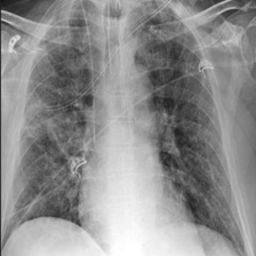

In [32]:
# Path to the directory containing images
xray_train_path = '/content/drive/My Drive/Infection_Segmentation_Data/Train/COVID-19/images'

# Get a list of all files in the directory
all_files = os.listdir(xray_train_path)

# Filter out only image files
covid_img_files = [file for file in all_files if file.lower().endswith(('.png'))]

# Sort the files
covid_img_files.sort()
print(covid_img_files)

random_image = random.choice(covid_img_files)
file_path = os.path.join(xray_train_path, random_image)
img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

train_images = covid_img_files

['covid_1.png', 'covid_11.png', 'covid_12.png', 'covid_14.png', 'covid_15.png', 'covid_16.png', 'covid_17.png', 'covid_20.png', 'covid_22.png', 'covid_23.png', 'covid_24.png', 'covid_25.png', 'covid_27.png', 'covid_28.png', 'covid_29.png', 'covid_31.png', 'covid_32.png', 'covid_33.png', 'covid_35.png', 'covid_37.png', 'covid_38.png', 'covid_39.png', 'covid_4.png', 'covid_41.png', 'covid_42.png', 'covid_44.png', 'covid_5.png', 'covid_6.png', 'covid_7.png', 'covid_9.png']


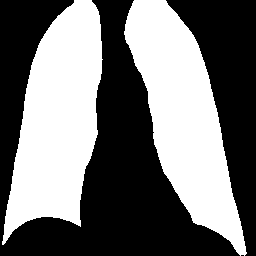

In [33]:
# Path to the directory containing images
inf_train_path = '/content/drive/My Drive/Infection_Segmentation_Data/Train/COVID-19/infection masks'

# Get a list of all files in the directory
all_files = os.listdir(inf_train_path)

# Filter out only image files
infection_mask_files = [file for file in all_files if file.lower().endswith(('.png'))]

# Sort the files
infection_mask_files.sort()

# Sort the files
print(infection_mask_files)

file_path = os.path.join(inf_train_path, random_image)
img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

train_masks = infection_mask_files

In [34]:
#Check corresponding images are present in both mask and image for Xray data
if train_images == train_masks:
  print('1')
else:
  print('0')

1


['covid_1902.png', 'covid_1903.png', 'covid_1905.png', 'covid_1907.png', 'covid_1908.png', 'covid_1909.png', 'covid_1911.png', 'covid_1912.png', 'covid_1913.png', 'covid_1914.png', 'covid_1918.png', 'covid_1919.png', 'covid_1920.png', 'covid_1921.png', 'covid_1922.png', 'covid_1923.png', 'covid_1927.png', 'covid_1930.png', 'covid_1933.png', 'covid_1934.png', 'covid_1935.png', 'covid_1938.png', 'covid_1939.png', 'covid_1940.png', 'covid_1941.png', 'covid_1943.png', 'covid_1944.png', 'covid_1947.png', 'covid_1948.png', 'covid_1950.png']


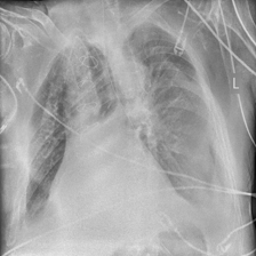

In [35]:
# Path to the directory containing images
xray_val_path = '/content/drive/My Drive/Infection_Segmentation_Data/Val/COVID-19/images'

# Get a list of all files in the directory
all_files = os.listdir(xray_val_path)

# Filter out only image files
covid_files = [file for file in all_files if file.lower().endswith(('.png'))]

# Sort the files
covid_files.sort()

# Sort the files if needed (optional)
print(covid_files)

random_image = random.choice(covid_files)
file_path = os.path.join(xray_val_path, random_image)
img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

val_images = covid_files

['covid_1902.png', 'covid_1903.png', 'covid_1905.png', 'covid_1907.png', 'covid_1908.png', 'covid_1909.png', 'covid_1911.png', 'covid_1912.png', 'covid_1913.png', 'covid_1914.png', 'covid_1918.png', 'covid_1919.png', 'covid_1920.png', 'covid_1921.png', 'covid_1922.png', 'covid_1923.png', 'covid_1927.png', 'covid_1930.png', 'covid_1933.png', 'covid_1934.png', 'covid_1935.png', 'covid_1938.png', 'covid_1939.png', 'covid_1940.png', 'covid_1941.png', 'covid_1943.png', 'covid_1944.png', 'covid_1947.png', 'covid_1948.png', 'covid_1950.png']


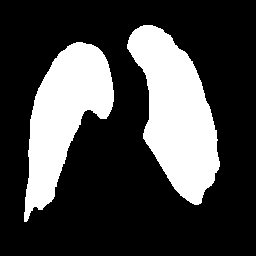

In [36]:
# Path to the directory containing images
inf_val_path = '/content/drive/My Drive/Infection_Segmentation_Data/Val/COVID-19/infection masks'

# Get a list of all files in the directory
all_files = os.listdir(inf_val_path)

# Filter out only image files
infection_mask_files = [file for file in all_files if file.lower().endswith(('.png'))]

# Sort the files
infection_mask_files.sort()

# Sort the files
print(infection_mask_files)

file_path = os.path.join(inf_val_path, random_image)
img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

val_masks = infection_mask_files

In [37]:
#Check corresponding images are present in both mask and image for validation data
if val_images == val_masks:
  print('1')
else:
  print('0')

1


In [38]:
def load_data(xray_dir,mask_dir,img_files):
  images = []
  masks = []
  for img_file in img_files:
          #read x_ray images
          img = cv2.imread(os.path.join(xray_dir, img_file), cv2.IMREAD_GRAYSCALE)

          #read infected mask images
          mask = cv2.imread(os.path.join(mask_dir, img_file), cv2.IMREAD_GRAYSCALE)

          #map to 0-1
          images.append(img / 255.0)
          masks.append(mask / 255.0)
  return np.expand_dims(np.array(images), -1), np.expand_dims(np.array(masks), -1)

In [39]:
train_images, train_masks = load_data(xray_train_path,inf_train_path, covid_img_files)
val_images, val_masks = load_data(xray_val_path,inf_val_path, covid_files)

In [40]:
# Compile and train the model
model = unet_model(input_shape)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(
    train_images, train_masks,
    validation_data=(val_images, val_masks),
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 310s 186s/step - accuracy: 0.8679 - loss: 0.6515 - val_accuracy: 0.8973 - val_loss: 0.4566
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 312s 181s/step - accuracy: 0.8517 - loss: 0.5197 - val_accuracy: 0.8973 - val_loss: 0.3671
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 328s 182s/step - accuracy: 0.8567 - loss: 0.4291 - val_accuracy: 0.8973 - val_loss: 0.3993
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 295s 159s/step - accuracy: 0.8672 - loss: 0.4210 - val_accuracy: 0.8973 - val_loss: 0.3610
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 298s 184s/step - accuracy: 0.8607 - loss: 0.4054 - val_accuracy: 0.8973 - val_loss: 0.3494


In [43]:
for layer in model.layers:
    weights = layer.get_weights()  # List of weight arrays for each layer
    if weights:  # Some layers have no weights (e.g., activation layers)
        print(f"Layer: {layer.name} | Weights Shape: {[w.shape for w in weights]}")
        print(weights)  # print weight arrays
        print()  # for spacing between layers

Layer: conv2d_38 | Weights Shape: [(3, 3, 1, 64), (64,)]
[array([[[[-5.09840585e-02,  2.91757267e-02, -2.74696648e-02,
           4.00278158e-03, -1.85569525e-02,  1.64274615e-03,
          -1.00694813e-01,  8.43758881e-02, -9.09260213e-02,
           3.09303477e-02, -3.58235985e-02, -9.57692564e-02,
          -2.82174740e-02, -6.05182424e-02, -3.17266397e-02,
          -5.77980876e-02, -3.20602171e-02, -3.81216817e-02,
          -2.87742354e-02,  8.69244859e-02, -7.37330550e-03,
          -9.32900682e-02, -1.36540635e-02, -1.59991474e-03,
           9.96967778e-02, -3.29521373e-02, -7.50788813e-03,
          -2.59815957e-02,  6.68058172e-02,  4.67577726e-02,
          -5.93173578e-02, -2.11209375e-02, -4.04566787e-02,
           2.17283368e-02, -6.67063892e-02, -3.45501676e-02,
           5.98921403e-02,  2.96137985e-02, -5.63952364e-02,
           8.46346021e-02,  8.10417980e-02, -6.09989092e-03,
           7.87375420e-02, -1.36164017e-05, -6.61707371e-02,
          -5.59279695e-03, 

In [ ]:
# Predict on a new image
def predict_mask(model, img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (256, 256)) / 255.0
    img = np.expand_dims(img, axis=(0, -1))  # Add batch and channel dimensions
    pred_mask = model.predict(img)
    return (pred_mask[0, :, :, 0] > 0.5).astype(np.uint8)  # Binary mask thresholding

In [ ]:
# Example prediction
predicted_mask = predict_mask(model, 'path/to/test/image.png')
cv2.imwrite('path/to/output/mask.png', predicted_mask * 255)